<a href="https://colab.research.google.com/github/PoojaGoel-IIT/histogram_matching/blob/main/Histogram_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram Matching

In the case of images, histograms are the statistical way to represent the pixel intensity distribution.
Two images can have similar intensity histograms, but they can differ spatially, i.e., how the intensities
are distributed. For this assignment, you need to perform Histogram Matching between two grayscale
images, A and B. Histogram matching transforms the source image (say A) histogram distribution to
the target image (say B) histogram distribution. In order to match the histogram of images A and B,
you need to first equalize the histogram of both images. Then, you need to map each pixel of A to B
using the equalized histograms and later modify each pixel of A based on B. Histogram equalization
is a method to transform the skewed distribution of image intensities into an approximately uniform
distribution over the [0, L], where L is the maximum possible intensity of an image, which in our case
is 255 (8-bit, Grayscale).
Note: We have provided an image dataset along with a pre-defined pair in Table 1 over which you
have to perform histogram matching. The sample result is shown in Fig. 2. DO NOT use any libraries
for histogram matching. You can refer to the opencv/PIL/scipy documentation for understanding.


In [1]:
#https://drive.google.com/drive/folders/1irUji1SOxJ8j1LPEv6oD18nlgOZzTdgN?usp=drive_link
!gdown --id 1pTXmxDHug24etz3T4u5uvwFWxSWRYjtZ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pTXmxDHug24etz3T4u5uvwFWxSWRYjtZ
To: /content/Dataset.zip
100% 3.24M/3.24M [00:00<00:00, 195MB/s]


In [2]:
!unzip -q Dataset.zip
!rm -rf Dataset.zip

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
image=cv2.imread("/content/Dataset/Dataset/histogram_matching/grey_4.png")

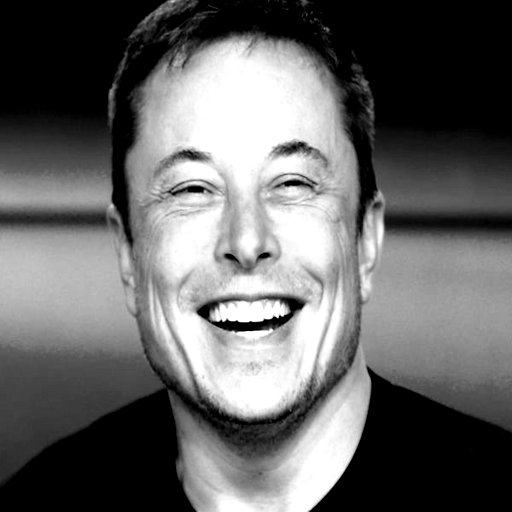

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [6]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image.shape


(512, 512)

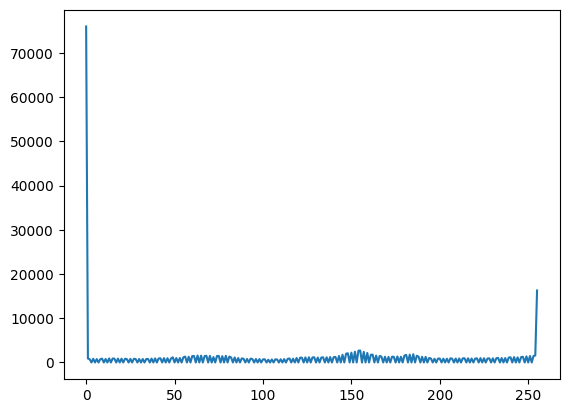

In [7]:
histr = cv2.calcHist([image],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

In [8]:
#generate histogram for an image
def generate_histogram(image):
  hist=np.zeros([256])
  for x_pixel in range(image.shape[0]):
    for y_pixel in range(image.shape[1]):
      pixel_value=int(image[x_pixel,y_pixel]);
      hist[pixel_value]+=1;

  return hist

In [9]:
hist=generate_histogram(image)


In [10]:
#print histogram for an image pass histogram array,name of histogram, title "histogram for image"
def print_histogram(_histrogram, name, title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    #plt.savefig("hist_" + name)

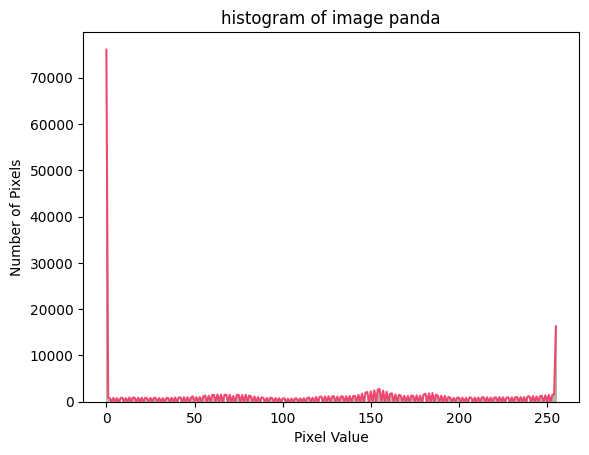

In [11]:
print_histogram(hist,"histo","histogram of image panda")

In [12]:
def eualize_histogram(_histrogram):
  eualized_hist=np.zeros([256])
  eualized_hist[0]=_histrogram[0]
  for i in range(1,256):
    eualized_hist[i]=eualized_hist[i-1]+_histrogram[i]
  return eualized_hist


In [13]:
equalized_hist=eualize_histogram(hist)
print(equalized_hist)

[ 76017.  76920.  77659.  77659.  78494.  78494.  79265.  79265.  80007.
  80877.  80877.  81672.  81672.  82586.  82586.  83485.  84343.  84343.
  85207.  85207.  86068.  86068.  86911.  87681.  87681.  88491.  88491.
  89324.  90097.  90097.  90885.  90885.  91668.  91668.  92441.  93233.
  93233.  94105.  94105.  95025.  95025.  95935.  96874.  96874.  97854.
  97854.  98813.  98813.  99720. 100887. 100887. 101887. 101887. 102901.
 102901. 104075. 105405. 105405. 106689. 106689. 108137. 109597. 109597.
 111172. 111172. 112715. 112715. 114157. 115673. 115673. 117178. 117178.
 118392. 118392. 119851. 121331. 121331. 122761. 122761. 124270. 124270.
 125614. 126749. 126749. 127885. 127885. 128892. 128892. 129809. 130656.
 130656. 131455. 131455. 132325. 133113. 133113. 133897. 133897. 134667.
 134667. 135366. 136093. 136093. 136722. 136722. 137408. 137408. 138116.
 138792. 138792. 139519. 139519. 140283. 140283. 141105. 142012. 142012.
 142873. 142873. 143884. 143884. 144957. 146053. 14

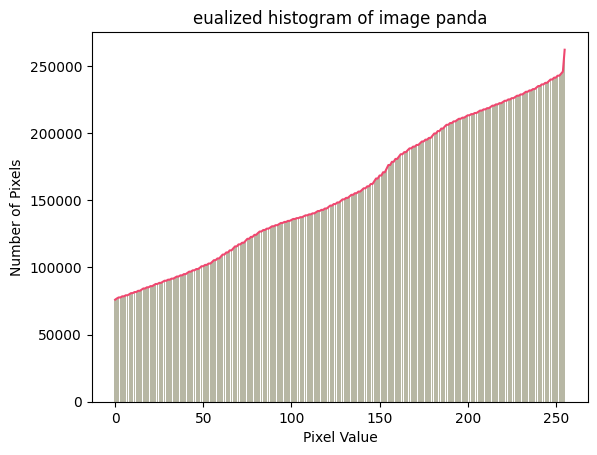

In [14]:
print_histogram(equalized_hist,"histo","eualized histogram of image panda")

In [15]:
def find_value_target(val, target_arr):
    # Find the indices where the value is equal to the target
    indices = np.where(target_arr == val)[0]

    if len(indices) == 0:
        # If the value is not found, recursively search for the nearest values
        lower_val = val - 1
        upper_val = val + 1

        while True:
            lower_indices = np.where(target_arr == lower_val)[0]
            upper_indices = np.where(target_arr == upper_val)[0]

            if len(lower_indices) > 0:
                return lower_indices[0]
            elif len(upper_indices) > 0:
                return upper_indices[0]

            # If both lower and upper values were not found, expand the search range
            lower_val -= 1
            upper_val += 1
    else:
        # If the value is found, return the first inde
      return indices[0]

In [16]:
def match_histogram(input_image,source,target):
  tran_hist=np.zeros_like(source)
  enhanced_image = np.zeros_like(input_image)
  for i in range(len(source)):
    tran_hist[i]=find_value_target(source[i],target);
  for x_pixel in range(input_image.shape[0]):
        for y_pixel in range(input_image.shape[1]):
            pixel_val = int(input_image[x_pixel, y_pixel])
            enhanced_image[x_pixel, y_pixel] = tran_hist[pixel_val]
  return enhanced_image



In [17]:
def plot_images(img1,img2,img3):
  # Assuming you have three images loaded and stored in img1, img2, and img3
  # Create a new figure
  plt.figure(figsize=(12, 4))
  # Plot the first image on the left
  plt.subplot(1, 3, 1)
  plt.imshow(img1, cmap='gray')
  plt.title('Source Image')
  plt.axis('off')  # Turn off axis labels
  # Plot the second image in the middle
  plt.subplot(1, 3, 2)
  plt.imshow(img2, cmap='gray')
  plt.title('Target Image')
  plt.axis('off')
  # Plot the third image on the right
  plt.subplot(1, 3, 3)
  plt.imshow(img3, cmap='gray')
  plt.title('Matched Histogram')
  plt.axis('off')
  # Adjust spacing between subplots
  plt.tight_layout()
  # Show the plot
  plt.show()


In [18]:
def Histogram_matching(source_image,target_image):
  source_img=cv2.imread(source_image)
  target_img=cv2.imread(target_image)
  source_img_gray=cv2.cvtColor(source_img,cv2.COLOR_BGR2GRAY)
  target_img_gray=cv2.cvtColor(target_img,cv2.COLOR_BGR2GRAY)
  source_hist=generate_histogram(source_img_gray)
  target_hist=generate_histogram(target_img_gray)
  source_equalized_hist=eualize_histogram(source_hist)
  target_equalized_hist=eualize_histogram(target_hist)
  enhanced_image=match_histogram(source_img_gray,source_equalized_hist,target_equalized_hist)
  plot_images(source_img_gray,target_img_gray,enhanced_image)





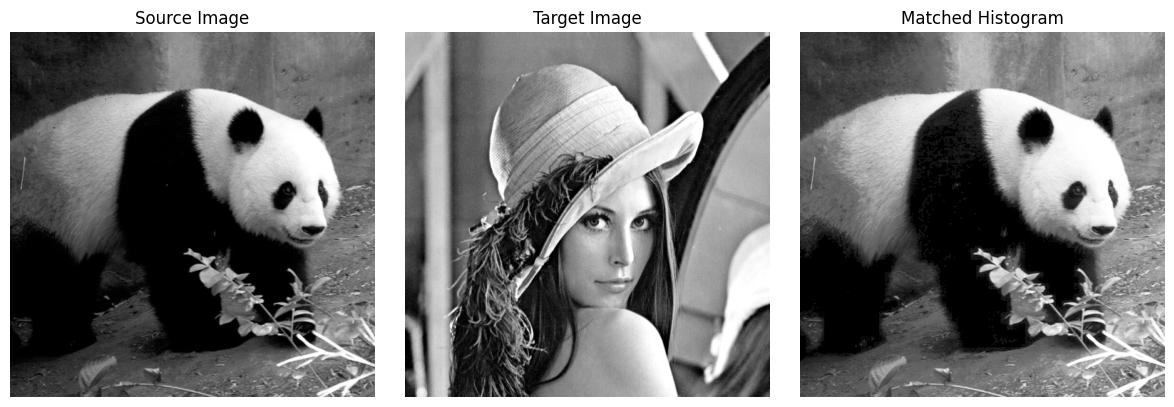

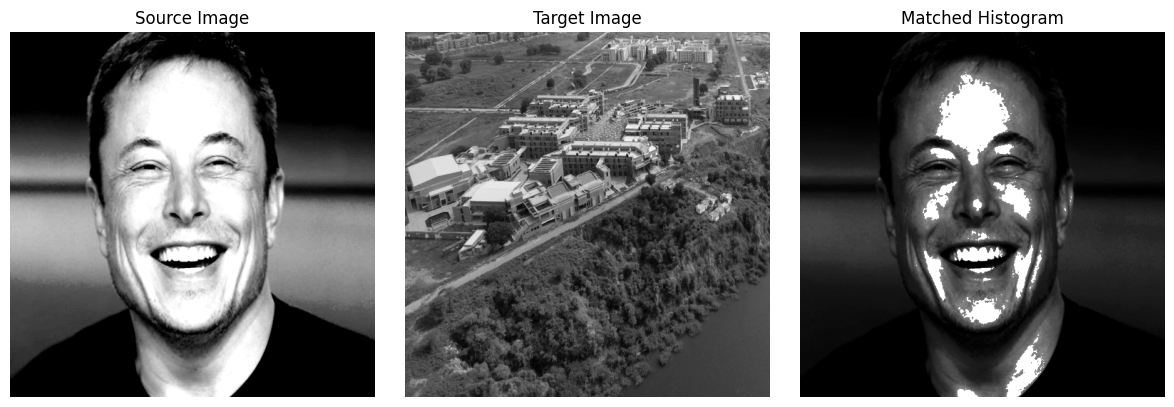

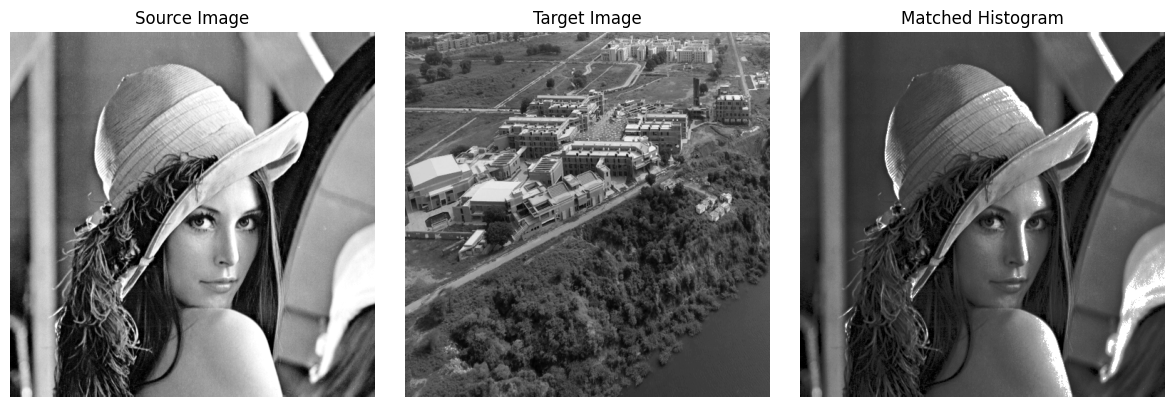

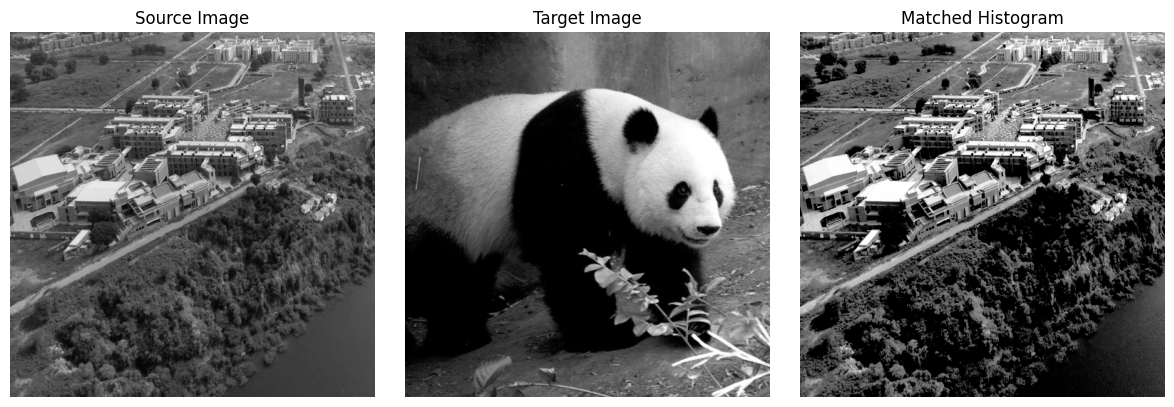

In [19]:
path1="/content/Dataset/Dataset/histogram_matching/grey_1.png"
path2="/content/Dataset/Dataset/histogram_matching/grey_2.png"
path3="/content/Dataset/Dataset/histogram_matching/grey_3.png"
path4="/content/Dataset/Dataset/histogram_matching/grey_4.png"

Histogram_matching(path1,path2)
Histogram_matching(path4,path3)
Histogram_matching(path2,path3)
Histogram_matching(path3,path1)
